<a href="https://colab.research.google.com/github/sezinbiner/ClassificationOfCovidXray/blob/main/with-knn-svm-rf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_dir = "/content/gdrive/MyDrive/bitirme dataset/train"
test_dir = "/content/gdrive/MyDrive/bitirme dataset/test"
validation_dir = "/content/gdrive/MyDrive/bitirme dataset/validation"
class_names = ['covid', 'normal']
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),  
        batch_size=20,
        shuffle=True,
        class_mode='binary')
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        shuffle=True,
        class_mode='binary')
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=1,
        class_mode='binary')

Found 4800 images belonging to 2 classes.
Found 1200 images belonging to 2 classes.
Found 1232 images belonging to 2 classes.


In [6]:
def extract_features(number_of_images, generator, batch_size):
  features = np.zeros(shape=(number_of_images, 7,7,512))
  labels = np.zeros(shape=(number_of_images))
  i = 0
  print("loop")
  for inputs_batch, labels_batch in generator:
      print(i)
      features_batch = extraction_layer.predict(inputs_batch)
      features[i * batch_size : (i + 1) * batch_size] = features_batch
      labels[i * batch_size : (i + 1) * batch_size] = labels_batch
      i += 1
      if i * batch_size >= number_of_images:
          break
  print("loop over")
  return features, labels

In [4]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import  InceptionV3
import numpy as np

extraction_layer = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)
extraction_layer.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [7]:
train_features, train_labels = extract_features(4800, train_generator, 20)
#validation_features, validation_labels = extract_features(1200, validation_generator, 20)
test_features, test_labels = extract_features(1232, test_generator, 1)

loop
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
loop over
loop
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd
import sklearn

In [11]:
def knn(x_train,y_train,x_test,y_test):
    rand_x = []
    rand_test = []
    #rand_x,rand_test = create_lbp(x_train,x_test)
    for img in x_train:
      t=np.ravel(img)
      rand_x.append(t)
    for img in x_test:
      t=np.ravel(img)
      rand_test.append(t)
    pixels = pd.DataFrame(rand_x)
    labels = pd.DataFrame(y_train)
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='distance')
    
    #Train the model using the training sets y_pred=clf.predict(X_test)
    knn.fit(rand_x,y_train)
    
    y_pred=knn.predict(rand_test)

    
    #Import scikit-learn metrics module for accuracy calculation
    from sklearn import metrics
    # Model Accuracy, how often is the classifier correct?
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    
    # from sklearn.model_selection import GridSearchCV
    # param_grid = {'n_neighbors': [5, 10, 15, 20, 25],  
    #           'weights': ['uniform','distance'], 
    #           'algorithm': ['auto','ball_tree','kd_tree','brute']}  
  
    # grid = GridSearchCV(knn, param_grid, refit = True, verbose = 3) 
  
    # # fitting the model for grid search 
    # #grid.fit(rand_x, y_train) 

    
    # model =  grid.fit(rand_x,y_train)
    
    # #y_pred_train = model.predict(rand_x)
    #     # predictions for test
    # y_pred_test = model.predict(rand_test)
    #     # training metrics
    #print("Training metrics:")
    # print(sklearn.metrics.classification_report(y_true= y_train, y_pred= y_pred_train))
        
         # test data metrics
    print("Test data metrics:")
    print(sklearn.metrics.classification_report(y_true= y_test, y_pred= y_pred))
    # print("Accuracy:",metrics.accuracy_score(y_pred_test, y_pred))
    # print("Best parameters:")
    # print(grid.best_params_) 
  
    #   # print how our model looks after hyper-parameter tuning 
    # print("Estimator:")
    # print(grid.best_estimator_) 

    return metrics.accuracy_score(y_test, y_pred)

In [12]:
knn(train_features,train_labels,test_features,test_labels)

Accuracy: 0.9512987012987013
Test data metrics:
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       616
         1.0       0.95      0.95      0.95       616

    accuracy                           0.95      1232
   macro avg       0.95      0.95      0.95      1232
weighted avg       0.95      0.95      0.95      1232



0.9512987012987013

In [14]:
def SVM(x_train,y_train,x_test,y_test):
    
    rand_x = []
    rand_test = []
    #rand_x,rand_test = create_lbp(x_train,x_test)
    for img in x_train:
      t=np.ravel(img)
      rand_x.append(t)
    for img in x_test:
      t=np.ravel(img)
      rand_test.append(t)
    pixels = pd.DataFrame(rand_x)
    labels = pd.DataFrame(y_train)
    from sklearn.svm import SVC
    svc=SVC(kernel='rbf')
    
    #Train the model using the training sets y_pred=clf.predict(X_test)
    svc.fit(rand_x,y_train)
    
    y_pred=svc.predict(rand_test)

    
    #Import scikit-learn metrics module for accuracy calculation
    from sklearn import metrics
    # Model Accuracy, how often is the classifier correct?
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    
    # from sklearn.model_selection import GridSearchCV
    # param_grid = {'C': [ 1, 10, 100],  
    #           'gamma': [0.1, 0.01, 0.001], 
    #           'kernel': ['rbf','poly','sigmoid']} 
  
    # grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
    # # fitting the model for grid search 
    # grid.fit(rand_x, y_train) 

    
    # #y_pred_train = model.predict(rand_x)
    #     # predictions for test
    # y_pred_test = grid.predict(rand_test)
    #     # training metrics
    #print("Training metrics:")
    #print(sklearn.metrics.classification_report(y_true= y_train, y_pred= y_pred_train))
        
        # test data metrics
    print("Test data metrics:")
    print(sklearn.metrics.classification_report(y_true= y_test, y_pred= y_pred))
    # print("Accuracy:",metrics.accuracy_score(y_pred_test, y_test))
    # print("Best parameters:")
    # print(grid.best_params_) 
  
    #   # print how our model looks after hyper-parameter tuning 

    # print("Estimator:")
    # print(grid.best_estimator_) 

    return metrics.accuracy_score(y_test, y_pred)


In [15]:
SVM(train_features,train_labels,test_features,test_labels)

Accuracy: 0.9448051948051948
Test data metrics:
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94       616
         1.0       0.94      0.95      0.95       616

    accuracy                           0.94      1232
   macro avg       0.94      0.94      0.94      1232
weighted avg       0.94      0.94      0.94      1232



0.9448051948051948

In [16]:
def random_forest(x_train,y_train,x_test,y_test):
    
    rand_x = []
    rand_test = []
    #rand_x,rand_test = create_lbp(x_train,x_test)
    for img in x_train:
      t=np.ravel(img)
      rand_x.append(t)
    for img in x_test:
      t=np.ravel(img)
      rand_test.append(t)
    pixels = pd.DataFrame(rand_x)
    labels = pd.DataFrame(y_train)
    #labels = pd.DataFrame(y_train)
    from sklearn.ensemble import RandomForestClassifier
    rf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
    
    #Train the model using the training sets y_pred=clf.predict(X_test)
    rf.fit(rand_x,y_train)
    
    y_pred=rf.predict(rand_test)

    
    #Import scikit-learn metrics module for accuracy calculation
    from sklearn import metrics
    # Model Accuracy, how often is the classifier correct?
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    
    # from sklearn.model_selection import GridSearchCV
    # clf = GridSearchCV(rf, param_grid={'n_estimators':[100,200],'min_samples_leaf':[2,3]})
    
    # clf.fit(rand_x,y_train)
    
    # #y_pred_train = clf.predict(rand_x)
    #     # predictions for test
    # y_pred_test = model.predict(rand_test)
    #     # training metrics
    # print("Training metrics:")
    #print(sklearn.metrics.classification_report(y_true= y_train, y_pred= y_pred_train))
        
        # test data metrics
    print("Test data metrics:")
    print(sklearn.metrics.classification_report(y_true= y_test, y_pred= y_pred))
    # print("Accuracy:",metrics.accuracy_score(y_pred_test, y_test))
    
    # print("Best parameters:")
    # print(clf.best_params_)

  
    #       # print how our model looks after hyper-parameter tuning 
    # print("Estimator:")
    # print(clf.best_estimator_)

    return metrics.accuracy_score(y_test, y_pred)

In [17]:
random_forest(train_features,train_labels,test_features,test_labels)

Accuracy: 0.939935064935065
Test data metrics:
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94       616
         1.0       0.94      0.94      0.94       616

    accuracy                           0.94      1232
   macro avg       0.94      0.94      0.94      1232
weighted avg       0.94      0.94      0.94      1232



0.939935064935065

In [ ]:
from keras.models import Sequential
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(
    loss='binary_crossentropy',
    optimizer= "adam" ,
    metrics=['accuracy']
)

In [ ]:
history = model.fit(train_features, train_labels,
                    epochs=100,
                    batch_size=16,
                    validation_data=(validation_features, validation_labels))

Epoch 1/100
300/300 [==============================] - 1s 4ms/step - loss: 0.0670 - accuracy: 0.9596 - val_loss: 0.2685 - val_accuracy: 0.9633
Epoch 2/100
300/300 [==============================] - 1s 4ms/step - loss: 0.0737 - accuracy: 0.9598 - val_loss: 0.1141 - val_accuracy: 0.9583
Epoch 3/100
300/300 [==============================] - 1s 4ms/step - loss: 0.0855 - accuracy: 0.9471 - val_loss: 0.1844 - val_accuracy: 0.9650
Epoch 4/100
300/300 [==============================] - 1s 4ms/step - loss: 0.0677 - accuracy: 0.9617 - val_loss: 0.1850 - val_accuracy: 0.9658
Epoch 5/100
300/300 [==============================] - 1s 3ms/step - loss: 0.0647 - accuracy: 0.9565 - val_loss: 0.1976 - val_accuracy: 0.9692
Epoch 6/100
300/300 [==============================] - 1s 4ms/step - loss: 0.0682 - accuracy: 0.9573 - val_loss: 0.2033 - val_accuracy: 0.9642
Epoch 7/100
300/300 [==============================] - 1s 3ms/step - loss: 0.0597 - accuracy: 0.9642 - val_loss: 0.1614 - val_accuracy: 0.9617

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3211392   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 3,211,521
Trainable params: 3,211,521
Non-trainable params: 0
_________________________________________________________________


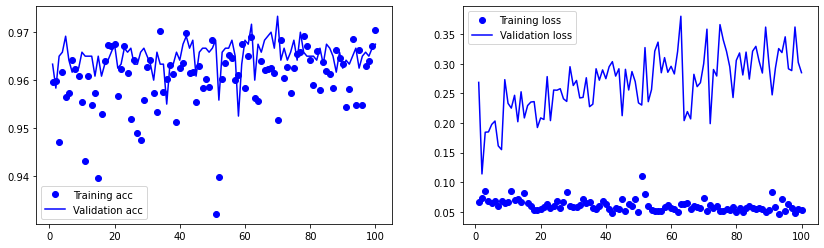

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

f, axes = plt.subplots(1,2,figsize=(14,4))

axes[0].plot(epochs, acc, 'bo', label='Training acc')
axes[0].plot(epochs, val_acc, 'b', label='Validation acc')
axes[0].legend()

axes[1].plot(epochs, loss, 'bo', label='Training loss')
axes[1].plot(epochs, val_loss, 'b', label='Validation loss')
axes[1].yaxis.set_label_position("right")
axes[1].legend()

plt.show()

In [ ]:
import tensorflow as tf
labels=[]
y_pred=model.predict(validation_features)
for prob in y_pred:
  if prob < 0.5:
    labels.append(0)
  else:
    labels.append(1)
from sklearn.metrics import confusion_matrix
confusion_matrix(validation_labels, labels)

array([[579,  21],
       [ 18, 582]])

In [ ]:
test_features, test_labels = extract_features(1232, test_generator, 1)

loop
loop over


In [ ]:
from sklearn import metrics
y_pred = model.predict(test_features)
probas = np.array(y_pred)
labels = []
for prob in probas:
  if prob < 0.5:
    labels.append(0)
  else:
    labels.append(1)
y_true_labels = test_labels
y_pred_labels = labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_true_labels, y_pred_labels)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_true_labels, y_pred_labels,pos_label='positive', average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_true_labels, y_pred_labels, average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')
print('F1 score: %f' % f1)
from sklearn.metrics import classification_report
print(classification_report(y_true_labels, y_pred_labels, target_names=["covid", "normal"]))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true_labels, y_pred_labels)

Accuracy: 0.972403
Precision: 0.972403
Recall: 0.972403
F1 score: 0.972397
              precision    recall  f1-score   support

       covid       0.99      0.96      0.97       616
      normal       0.96      0.99      0.97       616

    accuracy                           0.97      1232
   macro avg       0.97      0.97      0.97      1232
weighted avg       0.97      0.97      0.97      1232



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


array([[590,  26],
       [  8, 608]])

In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import  InceptionV3
from tensorflow.python.keras.applications.nasnet import NASNetMobile
import numpy as np

extraction_layer = NASNetMobile(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)
extraction_layer.summary()

In [ ]:
train_features, train_labels = extract_features(4800, train_generator, 20)
validation_features, validation_labels = extract_features(1200, validation_generator, 20)

loop
loop over
loop
loop over


In [ ]:
from keras.models import Sequential
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(
    loss='binary_crossentropy',
    optimizer= "adam" ,
    metrics=['accuracy']
)

In [ ]:
from keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau
learn_control = ReduceLROnPlateau(monitor='accuracy', patience=5,
                                  verbose=1,factor=0.2, min_lr=1e-7)

model_checkpoint = ModelCheckpoint('/content/gdrive/My Drive/models/nasnasnet.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [ ]:
history = model.fit(train_features, train_labels,
                    epochs=100,
                    batch_size=16,
                    validation_data=(validation_features, validation_labels),
                    callbacks=[learn_control, model_checkpoint])

Epoch 1/100
300/300 [==============================] - 2s 6ms/step - loss: 0.0588 - accuracy: 0.9769 - val_loss: 0.2814 - val_accuracy: 0.9658

Epoch 00001: val_loss improved from inf to 0.28140, saving model to /content/gdrive/My Drive/models/nasnasnet.h5
Epoch 2/100
300/300 [==============================] - 2s 5ms/step - loss: 0.0655 - accuracy: 0.9754 - val_loss: 0.2889 - val_accuracy: 0.9533

Epoch 00002: val_loss did not improve from 0.28140
Epoch 3/100
300/300 [==============================] - 1s 5ms/step - loss: 0.0583 - accuracy: 0.9769 - val_loss: 0.3070 - val_accuracy: 0.9608

Epoch 00003: val_loss did not improve from 0.28140
Epoch 4/100
300/300 [==============================] - 1s 5ms/step - loss: 0.0547 - accuracy: 0.9796 - val_loss: 0.2716 - val_accuracy: 0.9617

Epoch 00004: val_loss improved from 0.28140 to 0.27158, saving model to /content/gdrive/My Drive/models/nasnasnet.h5
Epoch 5/100
300/300 [==============================] - 2s 5ms/step - loss: 0.0552 - accuracy

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

f, axes = plt.subplots(1,2,figsize=(14,4))

axes[0].plot(epochs, acc, 'bo', label='Training acc')
axes[0].plot(epochs, val_acc, 'b', label='Validation acc')
axes[0].legend()

axes[1].plot(epochs, loss, 'bo', label='Training loss')
axes[1].plot(epochs, val_loss, 'b', label='Validation loss')
axes[1].yaxis.set_label_position("right")
axes[1].legend()

plt.show()

In [ ]:
test_features, test_labels = extract_features(1232, test_generator, 1)

In [ ]:
from sklearn import metrics
y_pred = model.predict(test_features)
probas = np.array(y_pred)
labels = []
for prob in probas:
  if prob < 0.5:
    labels.append(0)
  else:
    labels.append(1)
y_true_labels = test_labels
y_pred_labels = labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_true_labels, y_pred_labels)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_true_labels, y_pred_labels,pos_label='positive', average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_true_labels, y_pred_labels, average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')
print('F1 score: %f' % f1)
from sklearn.metrics import classification_report
print(classification_report(y_true_labels, y_pred_labels, target_names=["covid", "normal"]))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true_labels, y_pred_labels)